# Fracción de galaxias por grupo

**Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(0)
from collections import Counter
import numpy as np
from itertools import cycle, islice

import numpy as np
np.random.seed(0)

**Funtions**

In [2]:
def diff(list1, list2):
    c = set(list1).union(set(list2))  # or c = set(list1) | set(list2)
    d = set(list1).intersection(set(list2))  # or d = set(list1) & set(list2)
    return list(c - d)

### Galaxias en GC

**Load**

In [3]:
path_gal_gru = '../data/tab_gal_gru.dat'
df = pd.read_table(path_gal_gru, sep="\s+", names=['ngc', 'nk', 'alg', 'delg', 'zred', 'rmag', 'gmag', 'umag', 'gal_ID', 'r50', 'r90', 'r_abs', 'g_abs', 'u_abs'])

# , 'g_ps', 'g_early'
## g_ps= pasiva
## g_early early

id_gc_gal_grup = df.ngc.to_list()

path = '../data/compact_in_all'

df1 = pd.read_table(path, sep="\s+", names=['i_gru', 'n_m', 'Ra', 'dec', 'z', 'thete_g ', 'mu', 'sigv', 'r_b', 'flag',
'rabs1', 'd_ij', 'tcr', 'rp', 'rabs2', 'Target'])
id_gc_class = df1.i_gru.to_list()

In [4]:
display(df.describe())

,ngc,nk,alg,delg,zred,rmag,gmag,umag,gal_ID,r50,r90,r_abs,g_abs,u_abs
count,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2.070000e+03,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000
mean,233.122222,2.815459,190.252702,27.723103,0.042794,15.328896,16.088230,19.221081,1.237662e+18,-7.414175,-4.319799,-20.119825,-19.393180,-17.826410
std,134.431496,1.413787,37.849984,17.522322,0.017825,1.239176,1.217238,0.958491,6.453845e+12,68.365555,36.466009,1.142499,1.103947,1.002199
min,1.000000,1.000000,114.819000,-2.909000,0.002870,10.587000,11.410000,14.371000,1.237649e+18,-1000.000000,-1000.000000,-23.296690,-22.479040,-20.750630
25%,117.000000,2.000000,159.006250,13.427000,0.029774,14.415750,15.208000,18.637000,1.237658e+18,0.128870,0.022356,-20.931423,-20.158278,-18.522187
50%,234.000000,3.000000,188.987500,25.902500,0.039709,15.404500,16.131500,19.281500,1.237661e+18,0.305508,0.043263,-20.043260,-19.329500,-17.777480
75%,350.000000,4.000000,222.705750,40.907250,0.053250,16.334000,17.077000,19.913500,1.237667e+18,0.672004,0.101759,-19.317550,-18.657383,-17.123495
max,462.000000,8.000000,256.520000,67.384000,0.122845,17.691000,19.699000,24.514000,1.237674e+18,33.728298,34.252258,-16.650920,-9.894290,-11.328430


Calculo de nuevo si es pasiva o no:

In [5]:
# C_M = list(map(lambda x: -0.01059228*(x**2) - 0.4648955*x - 4.321844, df.r_abs))
C_M = list(map(lambda x: -0.03193*(x**2) - 1.46781*x  -14.33128, df.r_abs))

In [6]:
pasiva_2 = []
for i in range(df.shape[0]):
    if (df.u_abs.iloc[i] - df.r_abs.iloc[i] >= C_M[i]):
        pasiva_2.append(1)
    else:
        pasiva_2.append(0)

In [7]:
df['pasiva'] = pasiva_2

**Lista de GCs descartandos por corte de Magnitud**

In [8]:
diferencia = diff(id_gc_class, id_gc_gal_grup)
df = df.set_index('ngc').drop(diferencia)

In [9]:
df.shape

(2012, 14)

In [10]:
df = df.reset_index()

**Visualización y Curación**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2012 entries, 0 to 2011
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ngc     2012 non-null   int64  
 1   nk      2012 non-null   int64  
 2   alg     2012 non-null   float64
 3   delg    2012 non-null   float64
 4   zred    2012 non-null   float64
 5   rmag    2012 non-null   float64
 6   gmag    2012 non-null   float64
 7   umag    2012 non-null   float64
 8   gal_ID  2012 non-null   int64  
 9   r50     2012 non-null   float64
 10  r90     2012 non-null   float64
 11  r_abs   2012 non-null   float64
 12  g_abs   2012 non-null   float64
 13  u_abs   2012 non-null   float64
 14  pasiva  2012 non-null   int64  
dtypes: float64(11), int64(4)
memory usage: 235.9 KB


None

,ngc,nk,alg,delg,zred,rmag,gmag,umag,gal_ID,r50,r90,r_abs,g_abs,u_abs,pasiva
count,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2.012000e+03,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000
mean,233.149602,2.817097,190.201947,27.638412,0.043493,15.373400,16.135362,19.211730,1.237662e+18,-7.221065,-4.034410,-20.157619,-19.428971,-17.858869,0.705268
std,135.447818,1.416794,38.163741,17.374560,0.016899,1.190321,1.163361,0.961769,6.479377e+12,69.052210,36.410301,1.115163,1.079241,0.979605,0.456035
min,1.000000,1.000000,114.819000,-2.909000,0.012309,11.471000,12.307000,14.371000,1.237649e+18,-1000.000000,-1000.000000,-23.270410,-22.388150,-20.750630,0.000000
25%,115.000000,2.000000,158.595500,13.501000,0.030553,14.451000,15.250000,18.622500,1.237658e+18,0.128911,0.022402,-20.948863,-20.192290,-18.537957,0.000000
50%,236.000000,3.000000,189.313000,26.007500,0.040377,15.443000,16.172000,19.278500,1.237661e+18,0.303381,0.043109,-20.079295,-19.348950,-17.805575,1.000000
75%,352.000000,4.000000,223.070500,40.750000,0.053595,16.343500,17.089750,19.895750,1.237667e+18,0.664273,0.100388,-19.360315,-18.674310,-17.147540,1.000000
max,462.000000,8.000000,256.520000,66.738000,0.100278,17.668000,19.699000,24.514000,1.237674e+18,33.728298,34.252258,-17.060260,-9.894290,-11.328430,1.000000


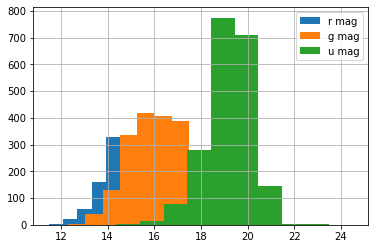

In [11]:
display(df.info())
display(df.describe())
#'rmag', 'gmag', 'umag', 'gal_ID', 'r50', 'r90', 'r_abs', 'g_abs', 'u_abs'
df.rmag.hist(label='r mag')
df.gmag.hist(label='g mag')
df.umag.hist(label='u mag')

plt.legend()

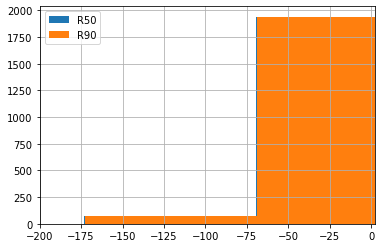

In [12]:
df.r50.hist(label='R50')
df.r90.hist(label='R90')
plt.xlim(-200, 2)

plt.legend()

In [13]:
df_r50 = df[df['r50'] == -1000].copy()
display(df_r50.shape)
df_r50

(9, 15)

,ngc,nk,alg,delg,zred,rmag,gmag,umag,gal_ID,r50,r90,r_abs,g_abs,u_abs,pasiva
66,15,6,121.777,19.860,0.039710,15.976,16.858,19.659,1237663916801786001,-1000.0,0.604849,-19.51146,-18.66552,-17.20320,1
81,18,3,124.280,27.584,0.040492,16.718,16.992,19.243,1237651496831483940,-1000.0,0.059566,-18.80476,-18.48622,-17.56059,0
223,50,4,141.623,22.063,0.027120,16.322,16.702,20.046,1237671124828094803,-1000.0,0.072244,-18.30459,-17.89988,-16.76749,0
1224,285,3,214.790,7.108,0.026080,15.679,16.301,19.351,1237661063878410300,-1000.0,0.034680,-18.86270,-18.24725,-16.90325,0
1245,290,3,216.237,47.899,0.072185,16.319,17.228,19.110,1237667255611883717,-1000.0,0.009437,-20.51825,-19.74013,-18.65374,0
1611,375,3,243.255,30.734,0.052153,16.890,17.500,19.598,1237671125379842189,-1000.0,0.466272,-19.21038,-18.63233,-17.28691,0
1639,382,2,246.649,40.893,0.030911,16.823,17.009,19.958,1237648722293620932,-1000.0,0.767239,-18.09729,-17.85594,-17.07128,0
1657,386,3,247.249,21.550,0.035910,16.070,16.393,19.176,1237661137960632448,-1000.0,0.038916,-19.18534,-18.82697,-17.85895,0
1993,458,7,244.013,38.493,0.034841,17.498,17.789,18.881,1237654605862010952,-1000.0,0.455097,-17.68919,-17.35726,-16.47146,0


In [14]:
df_r90 = df[df['r90'] == -1000].copy()
display(df_r90.shape)
df_r90

(2, 15)

,ngc,nk,alg,delg,zred,rmag,gmag,umag,gal_ID,r50,r90,r_abs,g_abs,u_abs,pasiva
311,71,4,150.649,32.709,0.051116,16.386,17.276,16.394,1237671262267441615,33.728298,-1000.0,-19.67963,-18.84862,-17.12664,1
1080,252,4,205.076,5.064,0.024467,16.339,17.103,17.109,1237667253462892735,2.967075,-1000.0,-18.06098,-17.30765,-15.75211,1


**Cantidad de pasivas por grupo**

In [15]:
df_pasivas = df.groupby(["ngc"])["pasiva"].sum()

In [16]:
len(df_pasivas.values)

449

In [17]:
df_pasivas = df_pasivas.reset_index()
df_pasivas.head(2)

,ngc,pasiva
0,1,3
1,2,4


**Match**

In [18]:
df1_sort = df1.sort_values('i_gru', ignore_index=True).copy()
df_pasivas_sort = df_pasivas.sort_values('ngc', ignore_index=True).copy()

In [19]:
df1_sort.head(2)

,i_gru,n_m,Ra,dec,z,thete_g,mu,sigv,r_b,flag,rabs1,d_ij,tcr,rp,rabs2,Target
0,1,4,114.842,45.103,0.078292,2.62,25.018,348.679,14.719,0,-22.375,0.143311,0.037275,87.756599,-20.608,Field
1,2,4,116.577,22.020,0.046817,4.09,25.289,274.092,14.289,0,-21.512,0.092313,0.030544,82.543709,-20.895,Loose


In [20]:
df_final = df1_sort.join(df_pasivas_sort)

In [21]:
df_final.shape

(449, 18)

In [22]:
df_final.tail()

,i_gru,n_m,Ra,dec,z,thete_g,mu,sigv,r_b,flag,rabs1,d_ij,tcr,rp,rabs2,Target,ngc,pasiva
444,458,7,243.981,38.537,0.034782,6.091,26.202,138.779,14.577,1,-20.570,0.103047,0.067340,91.589798,-20.088,Field,458,3
445,459,4,244.410,50.641,0.041362,4.748,25.610,552.432,14.146,1,-21.441,0.099180,0.016282,84.761040,-20.121,Loose,459,3
446,460,5,245.283,13.159,0.034352,3.715,24.912,247.585,14.328,1,-20.778,0.079042,0.028953,55.171383,-19.839,Loose,460,3
447,461,4,247.547,36.247,0.075265,3.671,25.664,383.398,14.479,1,-22.477,0.160493,0.037964,118.280334,-20.026,Field,461,3
448,462,5,250.332,13.424,0.050796,4.130,24.858,268.188,13.764,1,-22.276,0.112063,0.037895,90.346329,-21.427,Loose,462,5


In [23]:
df_final.columns

Index(['i_gru', 'n_m', 'Ra', 'dec', 'z', 'thete_g ', 'mu', 'sigv', 'r_b',
       'flag', 'rabs1', 'd_ij', 'tcr', 'rp', 'rabs2', 'Target', 'ngc',
       'pasiva'],
      dtype='object')

In [24]:
df_final.to_csv('df_pasiva.csv', index=False)

In [25]:
df_final['pasiva'].iloc[0]/df_final['n_m'].iloc[0]

0.75

In [26]:
frecuencia = []
for i in range(df_final.shape[0]):
    frac = df_final.pasiva.iloc[i]/df_final.n_m.iloc[i]
    frecuencia.append(frac)

In [27]:
len(frecuencia)

449

In [28]:
frecu_03 = list(map(lambda x: round(x, 3), frecuencia))

In [29]:
len(frecu_03)

449

In [30]:
df_final['frac'] = frecu_03

In [31]:
clases = list(set(df_final.Target))
clases = ['Node', 'FIl', 'Loose', 'Field', 'VoiS', 'VoiR']
#['Node', 'VoiR', 'Loose', 'Field', 'FIl', 'VoiS']

### Fracción de galaxias pasivas sin distinguir por entorno

<AxesSubplot:>

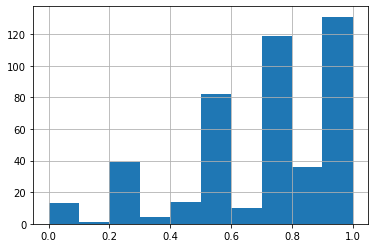

In [32]:
df_final.frac.hist()

In [33]:
clases

['Node', 'FIl', 'Loose', 'Field', 'VoiS', 'VoiR']

In [36]:
frac_index = list(set(df_final.frac))

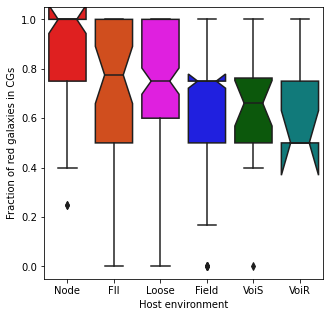

In [39]:
plt.figure(figsize=(5,5))
my_pal = {"Node":"red","FIl":"#EE4000", "Loose":"Magenta", "Field":"blue", "VoiS":"Darkgreen", "VoiR":"#008B8B"}
sns.boxplot(x=df_final.Target, y=df_final.frac, notch= True, order=[ 
                 'Node',  'FIl', 'Loose', 'Field', 'VoiS', 'VoiR'], palette=my_pal)
#, width=[0.5, 0.2, 1, 0.8, 0.4, 0.3]
plt.ylabel('Fraction of red galaxies in CGs')
plt.xlabel('Host environment')
plt.savefig('box_frac.pdf', format ='pdf',  bbox_inches='tight')

In [40]:
df_final[df_final['Target']==clases[0]].shape

(47, 19)

In [41]:
set(df_final.Target)

{'FIl', 'Field', 'Loose', 'Node', 'VoiR', 'VoiS'}

In [42]:
from matplotlib.cbook import boxplot_stats

In [43]:
Node = df_final[df_final['Target']=='Node']
display('Node-frac')
display(boxplot_stats(Node.frac)[0]['med'],
boxplot_stats(Node.frac)[0]['cihi']-boxplot_stats(Node.frac)[0]['med'])

FIl = df_final[df_final['Target']=='FIl']
display('FIl-frac')
display(boxplot_stats(FIl.frac)[0]['med'],
boxplot_stats(FIl.frac)[0]['cihi']-boxplot_stats(FIl.frac)[0]['med'])

Loose = df_final[df_final['Target']=='Loose']
display('Loose-frac')
display(boxplot_stats(Loose.frac)[0]['med'],
boxplot_stats(Loose.frac)[0]['cihi']-boxplot_stats(Loose.frac)[0]['med'])

Field = df_final[df_final['Target']=='Field']
display('Field-frac')
display(boxplot_stats(Field.frac)[0]['med'],
boxplot_stats(Field.frac)[0]['cihi']-boxplot_stats(Field.frac)[0]['med'])

VoiS = df_final[df_final['Target']=='VoiS']
display('VoiS-frac')
display(boxplot_stats(VoiS.frac)[0]['med'],
boxplot_stats(VoiS.frac)[0]['cihi']-boxplot_stats(VoiS.frac)[0]['med'])

VoiR = df_final[df_final['Target']=='VoiR']
display('VoiR-frac')
display(boxplot_stats(VoiR.frac)[0]['med'],
boxplot_stats(VoiR.frac)[0]['cihi']-boxplot_stats(VoiR.frac)[0]['med'])

'Node-frac'

1.0

0.05725200916292361

'FIl-frac'

0.775

0.11574193558159429

'Loose-frac'

0.75

0.05307568719695088

'Field-frac'

0.75

0.028702442646989845

'VoiS-frac'

0.6605

0.09215395152271011

'VoiR-frac'

0.5

0.13083333333333336

# Misma figura pero sin considerar submuestras

In [45]:
df_c0 = df_final[df_final['Target']==clases[0]].sort_values('frac') # Tomo la clase cero
dfa_c0 = pd.DataFrame(df_c0.frac.values) # Esa nueva lista la uso para definir el index de un nuevo df_c0 pero sin orden
display(dfa_c0.shape)

df_c1 = df_final[df_final['Target']==clases[1]].sort_values('frac')
dfa_c1 = pd.DataFrame(df_c1.frac.values)


df_c2 = df_final[df_final['Target']==clases[2]].sort_values('frac')
dfa_c2 = pd.DataFrame(df_c2.frac.values)


df_c3 = df_final[df_final['Target']==clases[3]].sort_values('frac')
dfa_c3 = pd.DataFrame(df_c3.frac.values)


df_c4 = df_final[df_final['Target']==clases[4]].sort_values('frac')
dfa_c4 = pd.DataFrame(df_c4.frac.values)


df_c5 = df_final[df_final['Target']==clases[5]].sort_values('frac')
dfa_c5 = pd.DataFrame(df_c5.frac.values)

#########################################################################################
Node = pd.DataFrame(Counter(df_c0.frac).values(), index=Counter(df_c0.frac).keys(), columns=['Node'])
FIl = pd.DataFrame(Counter(df_c1.frac).values(), index=Counter(df_c1.frac).keys(), columns=['FIl'])
Loose = pd.DataFrame(Counter(df_c2.frac).values(), index=Counter(df_c2.frac).keys(), columns=['Loose'])
Field = pd.DataFrame(Counter(df_c3.frac).values(), index=Counter(df_c3.frac).keys(), columns=['Field'])
VoiS = pd.DataFrame(Counter(df_c4.frac).values(), index=Counter(df_c4.frac).keys(), columns=['VoiS'])
VoiR = pd.DataFrame(Counter(df_c5.frac).values(), index=Counter(df_c5.frac).keys(), columns=['VoiR'])

#'Node', 'Fil', 'Loose', 'Field', 'VoidS', 'VoidR'
df_12_19 = pd.concat([Node, FIl, Loose, Field, VoiS, VoiR], axis=1)
display(df_12_19.head(2))

(47, 1)

,Node,FIl,Loose,Field,VoiS,VoiR
0.000,NaN,1.0,5.0,6.0,1.0,NaN
0.167,NaN,NaN,NaN,1.0,NaN,NaN


In [46]:
df_12_19.VoiS.shape

(20,)

In [48]:
df_12_19.head(2)

,Node,FIl,Loose,Field,VoiS,VoiR
0.000,NaN,1.0,5.0,6.0,1.0,NaN
0.167,NaN,NaN,NaN,1.0,NaN,NaN


In [49]:
df_12_22 = df_12_19.reset_index().copy()
df_12_22 = df_12_22.rename(columns={'index': 'frac'})
df_12_22 = df_12_22.fillna(0)
df_12_22.head(2)

,frac,Node,FIl,Loose,Field,VoiS,VoiR
0,0.000,0.0,1.0,5.0,6.0,1.0,0.0
1,0.167,0.0,0.0,0.0,1.0,0.0,0.0


https://kodlogs.com/33984/the-truth-value-of-an-array-with-more-than-one-element-is-ambiguous-use-a-any-or-a-all

In [50]:
df_12_22

,frac,Node,FIl,Loose,Field,VoiS,VoiR
0,0.000,0.0,1.0,5.0,6.0,1.0,0.0
1,0.167,0.0,0.0,0.0,1.0,0.0,0.0
2,0.200,0.0,0.0,1.0,4.0,0.0,0.0
3,0.250,2.0,3.0,8.0,21.0,0.0,0.0
4,0.333,0.0,0.0,0.0,2.0,0.0,0.0
5,0.375,0.0,0.0,2.0,0.0,0.0,0.0
6,0.400,1.0,1.0,3.0,6.0,1.0,0.0
7,0.429,0.0,0.0,0.0,2.0,0.0,0.0
8,0.500,2.0,9.0,11.0,28.0,6.0,5.0
9,0.571,0.0,0.0,0.0,0.0,2.0,0.0


In [51]:
# Binning of the data based on a condition
df_12_22.loc[df_12_22.frac < 0.2, 'frac'] = 10
df_12_22.loc[np.logical_and(df_12_22.frac >= 0.2, df_12_22.frac < 0.4), 'frac'] = 20
df_12_22.loc[np.logical_and(df_12_22.frac >= 0.4, df_12_22.frac < 0.6), 'frac'] = 30
df_12_22.loc[np.logical_and(df_12_22.frac >= 0.6, df_12_22.frac < 0.8), 'frac'] = 40
df_12_22.loc[np.logical_and(df_12_22.frac >= 0.8, df_12_22.frac <= 1.0), 'frac'] = 50
 
# Grouping and couting
df_12_22 = df_12_22.groupby('frac').sum()

In [52]:
df_12_22

,Node,FIl,Loose,Field,VoiS,VoiR
frac,,,,,,
10.0,0.0,1.0,5.0,7.0,1.0,0.0
20.0,2.0,3.0,11.0,27.0,0.0,0.0
30.0,3.0,10.0,14.0,36.0,9.0,5.0
40.0,14.0,9.0,45.0,73.0,5.0,2.0
50.0,28.0,23.0,65.0,44.0,5.0,2.0


In [53]:
#bines = ['bin 1', 'bin 2', 'bin 3', 'bin 4', 'bin 5' ]
bines = ['[0 - 0.2)', '[0.2 - 0.4)', '[0.4 - 0.6)', '[0.6 - 0.8)', '[0.8 - 1]' ]

In [54]:
df_12_22['bines'] = bines

In [55]:
df_fracciones_bin =  df_12_22.reset_index().set_index('bines').drop('frac', axis=1)

In [56]:
df_fracciones_bin 

,Node,FIl,Loose,Field,VoiS,VoiR
bines,,,,,,
[0 - 0.2),0.0,1.0,5.0,7.0,1.0,0.0
[0.2 - 0.4),2.0,3.0,11.0,27.0,0.0,0.0
[0.4 - 0.6),3.0,10.0,14.0,36.0,9.0,5.0
[0.6 - 0.8),14.0,9.0,45.0,73.0,5.0,2.0
[0.8 - 1],28.0,23.0,65.0,44.0,5.0,2.0


In [60]:
df_frac_bin_nor_bar = df_fracciones_bin.apply(lambda x: x/np.sum(x), axis=1)
df_frac_bin_nor_bar

,Node,FIl,Loose,Field,VoiS,VoiR
bines,,,,,,
[0 - 0.2),0.000000,0.071429,0.357143,0.500000,0.071429,0.000000
[0.2 - 0.4),0.046512,0.069767,0.255814,0.627907,0.000000,0.000000
[0.4 - 0.6),0.038961,0.129870,0.181818,0.467532,0.116883,0.064935
[0.6 - 0.8),0.094595,0.060811,0.304054,0.493243,0.033784,0.013514
[0.8 - 1],0.167665,0.137725,0.389222,0.263473,0.029940,0.011976


In [62]:
df_frac_bin_nor_env = df_fracciones_bin.apply(lambda x: x/np.sum(x), axis=0)
df_frac_bin_nor_env

,Node,FIl,Loose,Field,VoiS,VoiR
bines,,,,,,
[0 - 0.2),0.000000,0.021739,0.035714,0.037433,0.05,0.000000
[0.2 - 0.4),0.042553,0.065217,0.078571,0.144385,0.00,0.000000
[0.4 - 0.6),0.063830,0.217391,0.100000,0.192513,0.45,0.555556
[0.6 - 0.8),0.297872,0.195652,0.321429,0.390374,0.25,0.222222
[0.8 - 1],0.595745,0.500000,0.464286,0.235294,0.25,0.222222


https://www.webucator.com/article/python-color-constants-module/

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 360x360 with 0 Axes>

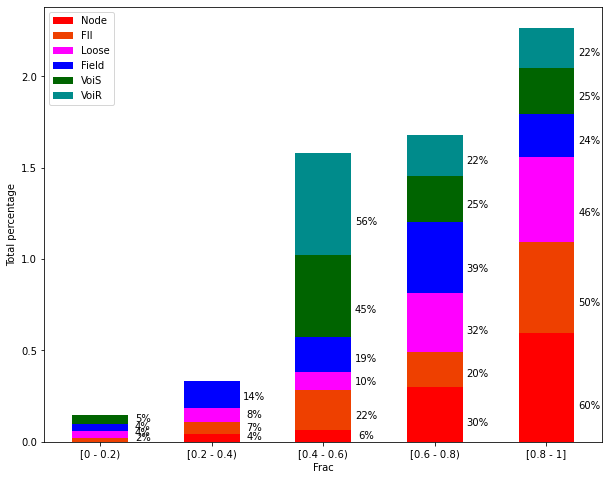

In [63]:
plt.figure(figsize=(5,5))

my_pal = {"Node":"red","FIl":"Orange", "Loose":"Magenta", "Field":"blue", "VoiS":"Darkgreen", "VoiR":"Deepskyblue"}
#color = ["Node":"red","FIl":"Orange", "Loose":"Magenta", "Field":"blue", "VoiS":"Darkgreen", "VoiR":"Deepskyblue"]
color = ["red", "#EE4000", "Magenta", "blue", "#006400", "#008B8B"]
ax = df_frac_bin_nor_env.plot(kind='bar', stacked=True, color=color)

plt.xlabel('Frac')
plt.ylabel('Total percentage')
plt.xticks(rotation=0)
#plt.xlim(1, 2)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    if height == 0.0: 
        continue
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/0.79, y + height*0.30), ha='center')
    
plt.savefig('df_frac_bin_nor_env.eps',format='eps')

In [64]:
df_fracciones_bin

,Node,FIl,Loose,Field,VoiS,VoiR
bines,,,,,,
[0 - 0.2),0.0,1.0,5.0,7.0,1.0,0.0
[0.2 - 0.4),2.0,3.0,11.0,27.0,0.0,0.0
[0.4 - 0.6),3.0,10.0,14.0,36.0,9.0,5.0
[0.6 - 0.8),14.0,9.0,45.0,73.0,5.0,2.0
[0.8 - 1],28.0,23.0,65.0,44.0,5.0,2.0


In [65]:
!pwd

/home/vdaza/compact_group_aug/plots
